Yêu cầu bài toán:

- The report explores at least 2 of the algorithms mentioned in the paper, namely Girvan-Newman, Fluid Communities, Label Propagation, Clique Percolation, Kernighan-Lin.

- Executing the code and running examples illustrating the learned algorithms on small-sized graphs. Visualize groups/communities easily.

- Search at least 2 large size datasets (from several hundred vertices) related to real world network data. Describe these datasets.

- Implement the learned algorithms on these datasets. Report execution time and summarize results.

- Use related metrics to compare algorithms with each other based on experimental results.

In [9]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
import networkx as nx
import string
import random
import collections
import time
import copy

---
## Girven-Newmen Algorithm

In [2]:
def Girven_Newmen(G, component=0):
    G = G.copy()
    step = 1
    while G.number_of_edges():
        # Tính Edge betweeness centrality và sắp xếp giảm dần
        sort_ascending_edge_centrality = sorted(nx.edge_betweenness_centrality(G).items(), key= lambda value : -value[1])

        # Kiểm tra nếu user có define bao nhiêu communities hoặc không thì chạy cho đến khi không còn cạnh nào
        if component == 0:
            differ = set()
            check = False
            for u in sort_ascending_edge_centrality:
                differ.add(u[1])
                if len(differ) >= 2:
                    check = True
                    break
            if not check:
                break
        else:
            if nx.number_connected_components(G) == component:
                break
                
        highest_pair_node = sort_ascending_edge_centrality[0][0]
        G.remove_edge(*highest_pair_node)

        nx.draw_spring(G,with_labels=True, node_color='red')
        plt.title(f'Step {step} Deleted {highest_pair_node}')
        plt.show()
        step += 1
    
    # phân chia group
    l = list()
    for i in G.nodes:
        if len(l) == component:
            break
        node_list = nx.node_connected_component(G,i)
        if node_list not in l:
            l.append(node_list)
    return l

### Áp dụng trên small-size Graph

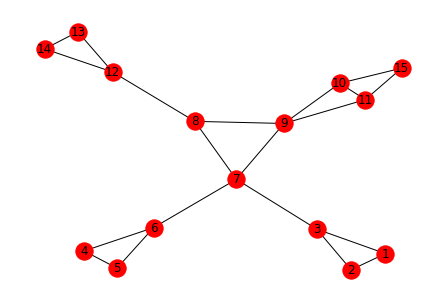

In [3]:
G = nx.Graph()
G.add_edges_from([[1,2],[1,3],[2,3],[3,7],[4,6],[4,5],[5,6],[6,7],[7,8],
                  [8,9],[8,12],[9,10],[9,11],[10,11],[12,13],[13,14],[12,14],[8,9],[7,9],[15,11],[15,10]])
nx.draw_spring(G, with_labels=True, node_color='red')

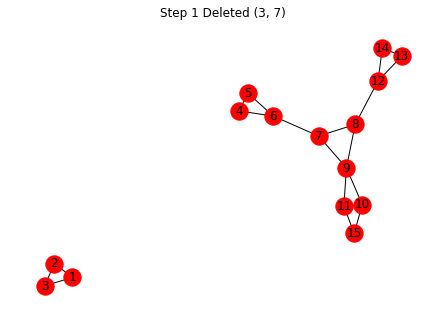

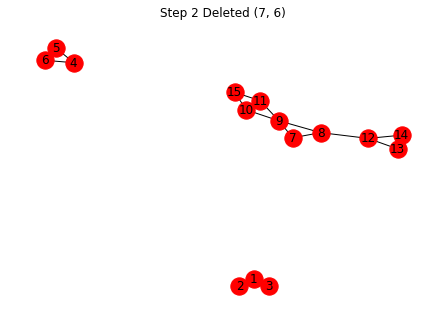

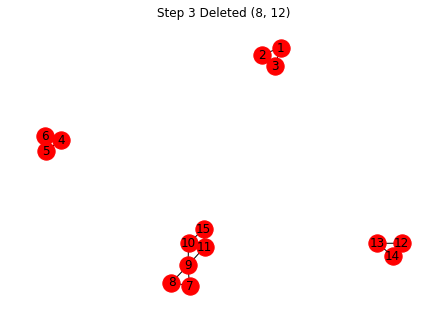

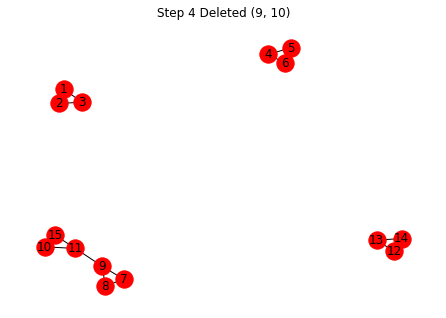

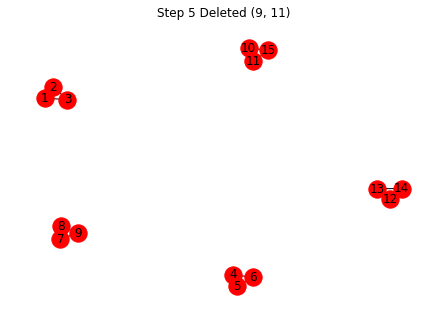

[{1, 2, 3}, {7, 8, 9}, {4, 5, 6}, {12, 13, 14}, {10, 11, 15}]

In [4]:
Girven_Newmen(G,5)

### Chạy trên đồ thị thực tế

#### Facebook Datasets 
Phần mô tả dataset nằm bên dưới cùng của file.

In [5]:
from networkx.algorithms.community.centrality import girvan_newman

G = nx.read_edgelist('facebook_combined.txt')

start = time.time()
communities = girvan_newman(G)
end = time.time()

print(f'Take {end-start}s to run Girven newman algorithm')


Take 3.790855407714844e-05s to run Girven newman algorithm


#### LastFM Asia Datasets

In [6]:
G = nx.Graph()
with open('lastfm_asia_edges.csv') as f:
    f.readline()
    line = f.readlines()
    for line in line:
        u = int(line.split(',')[0])
        v = int(line.split(',')[1].rstrip())
        G.add_edge(u,v)    
        
start = time.time()
communities = girvan_newman(G)
end = time.time()

print(f'Take {end-start}s to run Girven newman algorithm')


Take 0.0078029632568359375s to run Girven newman algorithm


---
## Fluid Communities Algorithm

15 5 1 2 1 3 2 3 3 7 4 6 4 5 5 6 6 7 7 8 8 9 8 12 9 10 9 11 10 11 12 13 13 14 12 14 8 9 7 9 15 11 15 10 0 0
Group: [[10, 11, 15], [8, 7, 9], [1, 3, 2], [4, 6, 5], [12, 13, 14]]
Weight: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Node được lấy ngẫu nhiên ban đầu: [[4], [13], [5], [3], [15]]


/var/folders/d5/xbgbf2fd405dcxkyzvm2qcr80000gn/T/ipykernel_36936/3626030838.py:16: RuntimeWarning: divide by zero encountered in true_divide
  weight = [*np.divide(1,tmp)]
/var/folders/d5/xbgbf2fd405dcxkyzvm2qcr80000gn/T/ipykernel_36936/3626030838.py:7: RuntimeWarning: invalid value encountered in double_scalars
  C_list = [[a * b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]


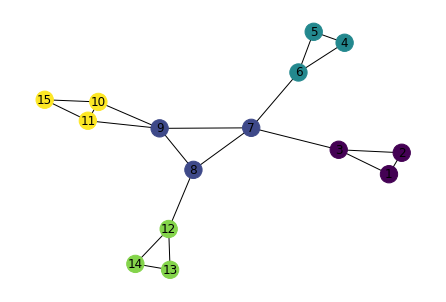

In [7]:
MAX = 100 # số lượng đỉnh tối đa
community = None

graph = [[] for _ in range(MAX)]

def mul_per_element_list(A_list, B_list):
    C_list = [[a * b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]   
    return C_list

def update_weight():
    global weight

    tmp = []
    for arr in group:
        tmp.append(np.count_nonzero(arr))
    weight = [*np.divide(1,tmp)]
    return

def Fluid_Community():
    for _ in range(n):
        random.shuffle(vertex)
        for u in vertex:
            Belong_to = [0] * community
            for v in graph[u]: # chạy từng đỉnh v để gán màu
                for index, i_group in zip(range(community),group): # chạy từng group rồi đếm
                    if v in i_group:
                        Belong_to[index] += 1
            Point_belong_to = np.argmax(mul_per_element_list([Belong_to],[weight]))

            # xóa trước khi đưa vào group
            for items in group:
                if u in items:
                    items.pop(items.index(u))

            group[Point_belong_to].append(u)

            # update lại weight
            update_weight()


list_input = list(map(int,input().split()))

n, com = list_input[0], list_input[1]
community = com
weight = [1] * community

# các đỉnh được sắp xếp ngẫu nhiên
vertex = [index for index in range(1,n+1)]

# group được liệt kê - giá trị weight tương ứng với mảng weight
group = [[] for _ in range(community)]

# gán ngẫu nhiên số lượng community cho các đỉnh ngẫu nhiên và đỉnh được chọn không giống nhau.
rand = random.sample(vertex,community)
for i in range(community):
    group[i].append(rand[i])


original_vertex = copy.deepcopy(group)
get_edge = 2

Graph = nx.Graph()

while True:
    u, v = list_input[get_edge], list_input[get_edge+1]
    if u == 0 and v == 0:
        break
    graph[u].append(v)
    graph[v].append(u)
    get_edge += 2
    
    Graph.add_edge(u,v)
    
Fluid_Community()

print('Group:',group)
print('Weight:',weight)
print('Node được lấy ngẫu nhiên ban đầu:',original_vertex)

color = [random.sample(range(255),1) for _ in range(community)]
color_map = []
for node in Graph:
    for i_group,index in zip(group,range(community)):
        if node in i_group:
            color_map.append(color[index])
nx.draw_spring(Graph,node_color=color_map, with_labels=True)

# 7 2 1 2 1 6 1 7 2 3 2 6 3 2 3 4 3 5 4 5 6 7 0 0
# 15 5 1 2 1 3 2 3 3 7 4 6 4 5 5 6 6 7 7 8 8 9 8 12 9 10 9 11 10 11 12 13 13 14 12 14 8 9 7 9 15 11 15 10 0 0

### Chạy trên đồ thị thực tế

#### Facebook datasets

In [10]:
G = nx.read_edgelist('facebook_combined.txt')

start = time.time()
communities = community.asyn_fluidc(G,5)
end = time.time()
print(f'Take {end-start} to run asyn fluidc algorithm')


Take 0.7158100605010986 to run asyn fluidc algorithm


#### LastFM Asia Datasets

In [28]:
G = nx.Graph()
with open('lastfm_asia_edges.csv') as f:
    f.readline()
    line = f.readlines()
    for line in line:
        u = int(line.split(',')[0])
        v = int(line.split(',')[1].rstrip())
        G.add_edge(u,v)    

start = time.time()
communities = community.asyn_fluidc(G,5)
end = time.time()
print(f'Take {end-start}s to run asyn fluidc algorithm')



Take 0.4736039638519287s to run asyn fluidc algorithm


---
## Mô tả đồ thị thực tế (Facebook datasets)

#### Mô tả về đồ thị

In [12]:
G = nx.read_edgelist('facebook_combined.txt')

In [13]:
average_degree = nx.number_of_edges(G) / nx.number_of_nodes(G)
print(nx.info(G))
print('Average Degree', average_degree)

Graph with 4039 nodes and 88234 edges
Average Degree 21.84550631344392


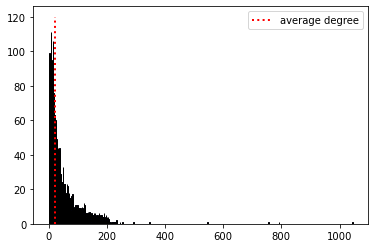

In [14]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='b', edgecolor='black')
plt.vlines(x=average_degree, ymin=0, ymax=120, colors='red', ls=':', lw=2, label='average degree')
plt.legend()

In [15]:
nx.diameter(G)

8

In [16]:
def Number_of_node_near_average_degree(G, dist):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
    degreeCount = collections.Counter(degree_sequence)

    count_node = 0
    average_degree = nx.number_of_edges(G) / nx.number_of_nodes(G)
    for key,value in degreeCount.items():
        if key >=  average_degree - dist and key <= average_degree + dist:
            count_node += value
    return count_node
print(f'Percentage of node near average degree: {round((Number_of_node_near_average_degree(G,10) / nx.number_of_nodes(G)) * 100,4)}%')

Percentage of node near average degree: 31.2206%


In [17]:
center = nx.center(G)
center

['567']

In [18]:
any(item in center for item in sorted([n for n, d in G.degree()], reverse=True)[:100])

False

---
## Mô tả đồ thị thực tế (LastFM datasets)

In [19]:
G = nx.Graph()
with open('lastfm_asia_edges.csv') as f:
    f.readline()
    line = f.readlines()
    for line in line:
        u = int(line.split(',')[0])
        v = int(line.split(',')[1].rstrip())
        G.add_edge(u,v)    

In [20]:
average_degree = nx.number_of_edges(G) / nx.number_of_nodes(G)
print(nx.info(G))
print('Average Degree', average_degree)

Graph with 7624 nodes and 27806 edges
Average Degree 3.6471668415529908


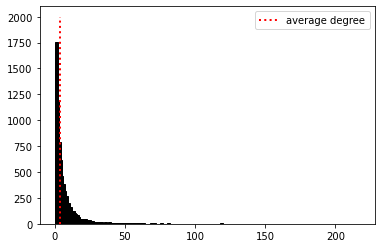

In [21]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='black', edgecolor='black')
plt.vlines(x=average_degree, ymin=0, ymax=2000, colors='red', ls=':', lw=2, label='average degree')
plt.legend()

In [22]:
nx.diameter(G)

15

In [23]:
def Number_of_node_near_average_degree(G, dist):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
    degreeCount = collections.Counter(degree_sequence)

    count_node = 0
    average_degree = nx.number_of_edges(G) / nx.number_of_nodes(G)
    for key,value in degreeCount.items():
        if key >=  average_degree - dist and key <= average_degree + dist:
            count_node += value
    return count_node
print(f'Percentage of node near average degree: {round((Number_of_node_near_average_degree(G,10) / nx.number_of_nodes(G)) * 100,4)}%')

Percentage of node near average degree: 86.4113%


In [25]:
center = nx.center(G)
center

[5454, 2892, 5646, 7199, 7030, 4309, 1281, 1444, 4119]

In [38]:
any(item in center for item in sorted([n for n, d in G.degree()], reverse=True)[:100])

False